## 베이직반 통계 1차시 복습퀴즈 풀이

### 정답

1. df 에서 질적데이터(명목형, 순위형)에 해당하는 컬럼을 모두 선택해주세요.  
   **Active, section_no, index_group_no, product_type_no**

2. df에서 이산형 데이터에 해당하는 컬럼을 모두 선택해주세요.  
   **age**

3. price를 히스토그램으로 그렸을 때 그래프는 어느쪽으로 솟아있나요?  
   **왼쪽**

4. price의 히스토그램을 해석한 결과로 틀린 것은?  
   **price의 평균이 중앙값보다 작다 → 평균이 중앙값보다 크다**

5. age의 표준편차를 입력해주세요 (소수점 둘째자리까지)  
   **13.01**

6. price의 제3사분위수(75%)를 입력해주세요 (소수점 둘째자리까지)  
   **33.88**

7. price를 iqr 방식으로 처리했을 때, 이상치로 분류되는 데이터의 행 개수는 몇 개인가요?  
   **38,557**

8. 신뢰수준이 높아질수록 신뢰구간은 넓어진다  
   **True**


### Baseline (주어진 코드)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import platform

pd.set_option('display.float_format',"{:.2f}".format)

# OS에 따라 다른 폰트 지정
if platform.system() == 'Darwin':   # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux (예: Colab, Ubuntu)
    plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
folder_path = "hm_dataset 폴더 경로" #########--------------------- 자기 경로로 수정하기!
article_df = pd.read_csv(folder_path+"/articles_hm.csv")
customer_df = pd.read_csv(folder_path+"/customer_hm.csv")
transaction_df = pd.read_csv(folder_path+"/transactions_hm.csv")

In [ ]:
whole_df = pd.merge(
    pd.merge(
        transaction_df,
        customer_df,
        on = 'customer_id'
    ),
    article_df,
    on ='article_id'
)
df = whole_df[['t_dat','customer_id','Active','age','section_no','section_name','index_group_no','index_group_name','product_type_no','product_type_name','price']].copy()
df['price'] = df['price']*1000

/var/folders/t1/q06mfd155s9gxyx6fqq13yjc0000gn/T/ipykernel_62278/4219465257.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price']*1000


### 1. df 에서 질적데이터(명목형, 순위형)에 해당하는 컬럼을 모두 선택해주세요. 
### 2. df에서 이산형 데이터에 해당하는 컬럼을 모두 선택해주세요.  


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812931 entries, 0 to 812930
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   t_dat              812931 non-null  object 
 1   customer_id        812931 non-null  object 
 2   Active             812931 non-null  int64  
 3   age                812931 non-null  int64  
 4   section_no         812931 non-null  int64  
 5   section_name       812931 non-null  object 
 6   index_group_no     812931 non-null  int64  
 7   index_group_name   812931 non-null  object 
 8   product_type_no    812931 non-null  int64  
 9   product_type_name  812931 non-null  object 
 10  price              812931 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 68.2+ MB


In [18]:
df.head()

,t_dat,customer_id,Active,age,section_no,section_name,index_group_no,index_group_name,product_type_no,product_type_name,price
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,1,51,53,Divided Collection,2,Divided,252,Sweater,16.93
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,0,28,6,Womens Casual,1,Ladieswear,254,Top,33.88
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,1,37,21,Contemporary Casual,3,Menswear,274,Shorts,16.93
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,0,19,65,Womens Big accessories,1,Ladieswear,66,Bag,33.88
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,0,35,26,Men Underwear,3,Menswear,302,Socks,3.22


head()를 보고 직접 유추해서 답을 찾아낸다. 자세한 설명은 세션해설 참고 

### 3. price를 히스토그램으로 그렸을 때 그래프는 어느쪽으로 솟아있나요?  
### 4. price의 히스토그램을 해석한 결과로 틀린 것은?  


<Axes: >

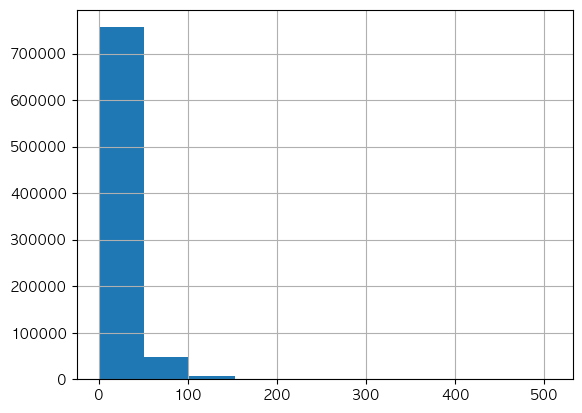

In [23]:
df['price'].hist()

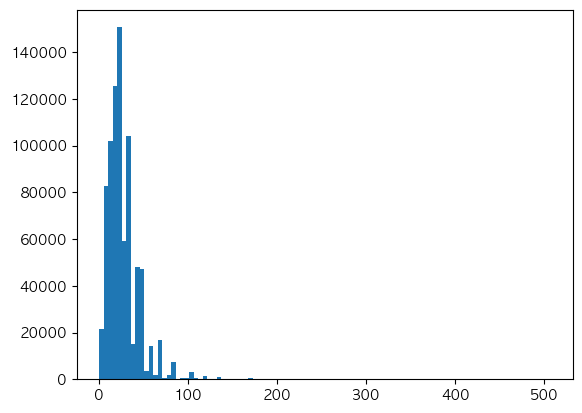

In [21]:
plt.hist(df['price'],bins=100)
plt.show()

히스토그램을 그려보았을 때, 그래프는 왼쪽으로 솟아있는 모양을 하고 있다 (왼쪽으로 치우쳐 있다) <br>
이를 다른 말로 오른쪽으로 꼬리가 긴 분포라고도 한다. (right-skewed distribution) <br>

오른쪽으로 꼬리가 긴 분포의 특징은 소수의 이상치가 평균을 높게 만들어버린다는 것이다. 즉 평균이 중앙값보다 높아지는 현상이 발생하게 된다. 이는 아래 describe() 결과를 보면 더욱 명확히 알 수 있다. <br>
이외의 100,300,400이란 숫자가 들어간 해석은 구간을 잘게 해놓은 아래의 히스토그램은 명확하게 보이니 설명은 생략하겠다. 


In [24]:
df['price'].describe()

count   812931.00
mean        27.77
std         19.32
min          0.24
25%         15.24
50%         25.41
75%         33.88
max        506.78
Name: price, dtype: float64

### 5. age의 표준편차를 입력해주세요(소수점 둘째자리까지) 
### 6. price의 제3사분위수(75%)를 입력해주세요 (소수점 둘째자리까지) 

In [25]:
df.describe()

,Active,age,section_no,index_group_no,product_type_no,price
count,812931.00,812931.00,812931.00,812931.00,812931.00,812931.00
mean,0.43,36.36,36.61,2.35,245.69,27.77
std,0.49,13.01,23.01,4.66,67.75,19.32
min,0.00,16.00,2.00,1.00,-1.00,0.24
25%,0.00,26.00,15.00,1.00,253.00,15.24
50%,0.00,32.00,47.00,1.00,264.00,25.41
75%,1.00,48.00,60.00,2.00,273.00,33.88
max,1.00,99.00,97.00,26.00,532.00,506.78


### 7. price를 iqr 방식으로 처리했을 때, 이상치로 분류되는 데이터의 행 개수는 몇 개인가요?

In [10]:
q_1 =np.percentile(df['price'], q=25)
q_3 =np.percentile(df['price'], q=75)
iqr = q_3 - q_1

lower_whisker = q_1 - 1.5*iqr
upper_whisker = q_3 + 1.5*iqr

In [11]:
# 38557행
df.loc[(df['price']<lower_whisker)|(df['price']>upper_whisker)]

,t_dat,customer_id,Active,age,section_no,section_name,index_group_no,index_group_name,product_type_no,product_type_name,price
13,2019-12-16,60ddf2a3025c0d258e6e36a49ef4552dc1387ef9101ef0...,0,27,15,Womens Everyday Collection,1,Ladieswear,265,Dress,152.53
36,2019-11-05,af009bb3c25a04b40141dccee0dbddae745f8605f2e560...,1,27,57,Ladies Denim,2,Divided,272,Trousers,84.73
81,2019-09-12,bb662fafda64d7623825257ef73b8f726b93d48948fd63...,0,34,8,Mama,1,Ladieswear,272,Trousers,67.78
87,2019-11-13,a6ccf7f0366a494bab9b92063066a060d6dbb20fd29d35...,1,29,64,Womens Shoes,1,Ladieswear,90,Pumps,101.68
151,2019-09-25,111a15bce93afd74f15e28b58b3c353cb6df2bf3f9d773...,1,67,57,Ladies Denim,2,Divided,272,Trousers,84.73
...,...,...,...,...,...,...,...,...,...,...,...
812865,2019-12-06,8ad59d85354cbb6be1dd27fb6ea399674002e7fd7f1bdd...,1,52,23,Men Suits & Tailoring,3,Menswear,264,Blazer,101.68
812869,2019-04-22,607bde8769e0d7ea2c19e025db2eecfdc68620312c73c2...,0,25,57,Ladies Denim,2,Divided,262,Jacket,67.78
812895,2019-03-28,5b712ec2c675ca9c4a2949795aed3c0ff5a35c845c9b22...,1,27,57,Ladies Denim,2,Divided,272,Trousers,67.78
812903,2019-03-04,025c705b7d9f959782e5b4e62ddfde1950335aec4e7f65...,1,23,19,Womens Jackets,1,Ladieswear,262,Jacket,101.68
